<a href="https://colab.research.google.com/github/sahiiljadhav/Image-enhancement/blob/main/Untitled13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2  # For image processing
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizing images


In [9]:
# Display two images side-by-side
def display_images(original, transformed, title1='Original Image', title2='Transformed Image'):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(original, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(transformed, cmap='gray')
    plt.axis('off')
    plt.show()

# Digital Negative
def digital_negative(img):
    return 255 - img

# Bit Plane Slicing
def bit_plane_slicing(img, bit_position):
    bit_plane = (img >> bit_position) & 1
    return bit_plane * 255

# Gray Level Slicing
def gray_level_slicing(img, lower, upper):
    sliced = np.where((img >= lower) & (img <= upper), 255, 0)
    return sliced.astype(np.uint8)

# Gamma Correction
def gamma_correction(img, gamma):
    img = img / 255.0
    corrected = np.power(img, gamma) * 255
    return np.uint8(corrected)

# Log Transformation
def log_transformation(img):
    img = img + 1  # To avoid log(0)
    c = 255 / np.log(1 + np.max(img))
    log_transformed = c * np.log(img)
    return np.uint8(log_transformed)

# Contrast Stretching
def contrast_stretching(img, r_min, r_max):
    # Ensure img is a NumPy array of proper type
    img = np.asarray(img, dtype=np.float32)

    # Perform contrast stretching
    stretched = (img - r_min) * (255 / (r_max - r_min))

    # Clip values to the range [0, 255] and convert to uint8
    stretched = np.clip(stretched, 0, 255).astype(np.uint8)
    return stretched

In [7]:
# List of image file names
image_files = ['mri.jpg', 'planet.jpg', 'sachin.jpg', 'xray.jpg']


<ipython-input-9-b2b17f3797d7>:38: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(img)
<ipython-input-9-b2b17f3797d7>:39: RuntimeWarning: invalid value encountered in cast
  return np.uint8(log_transformed)


Processing mri.jpg...


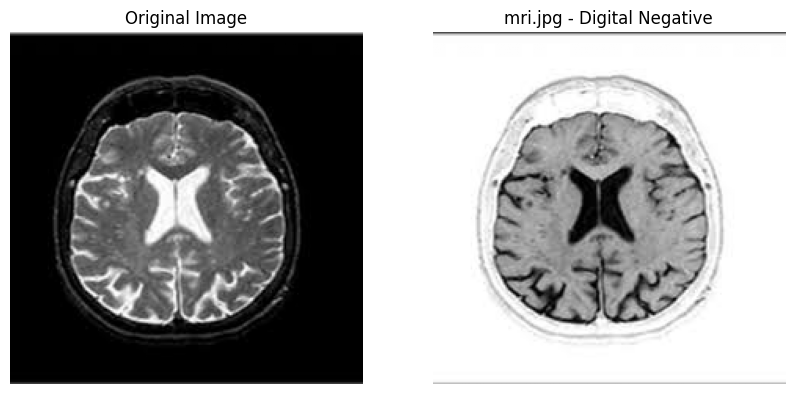

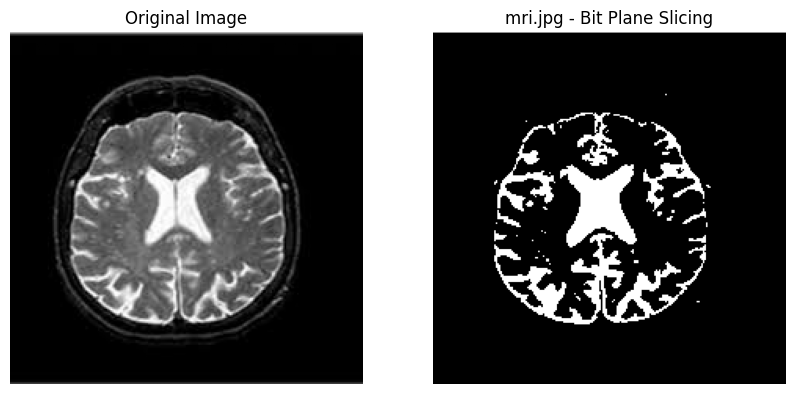

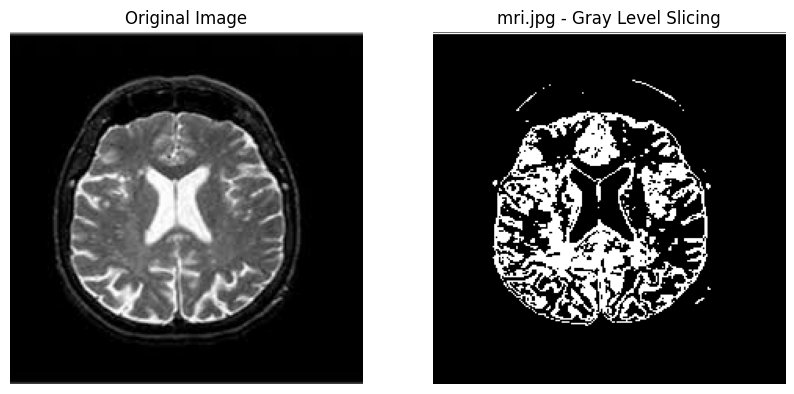

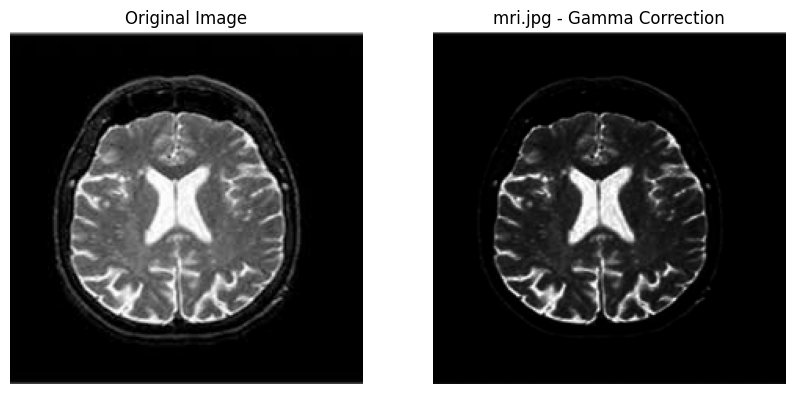

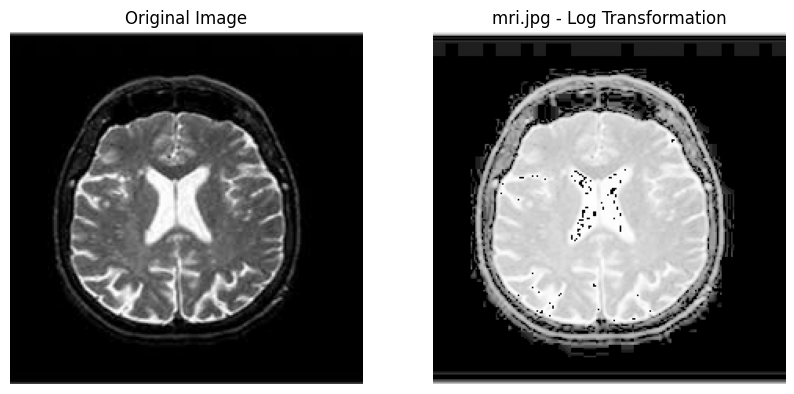

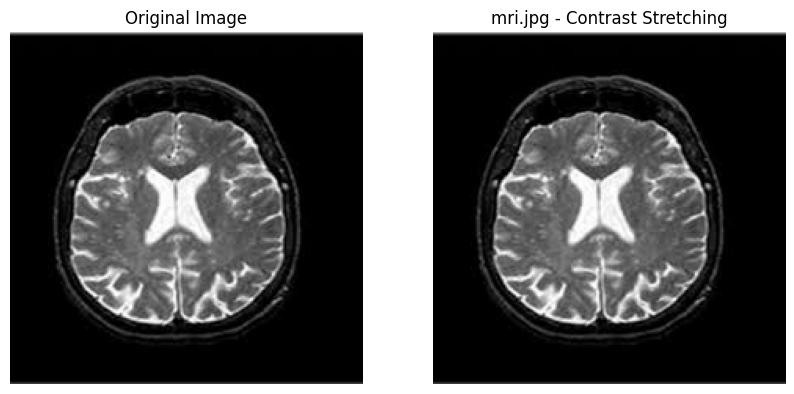

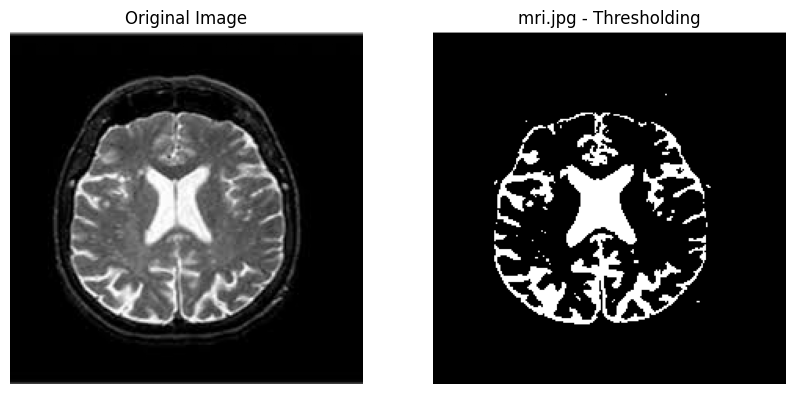

Processing planet.jpg...


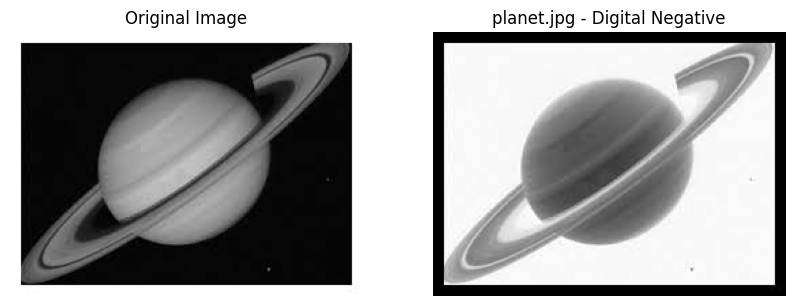

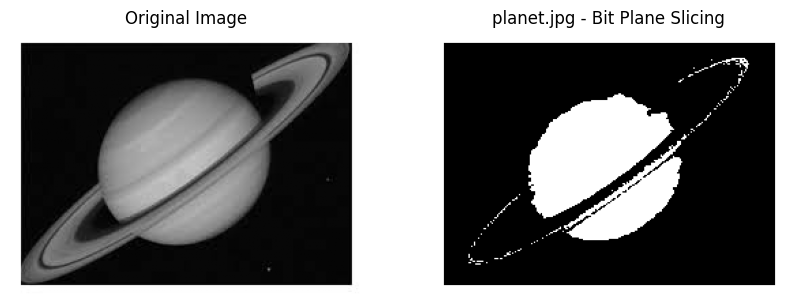

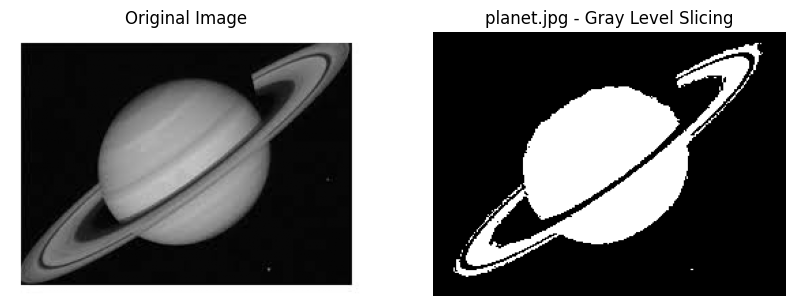

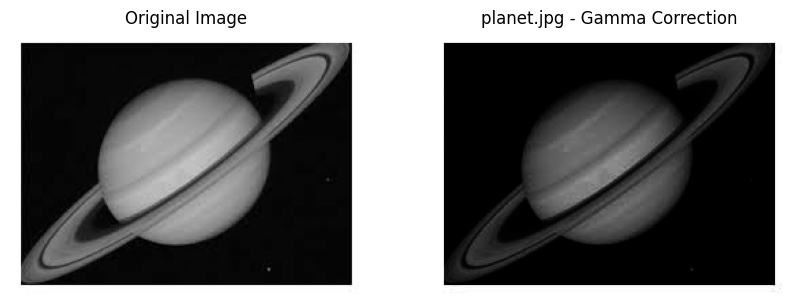

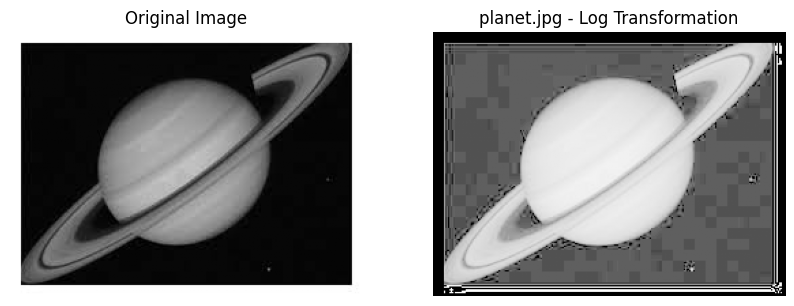

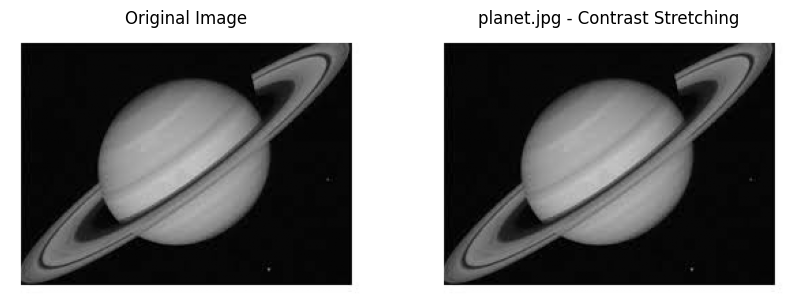

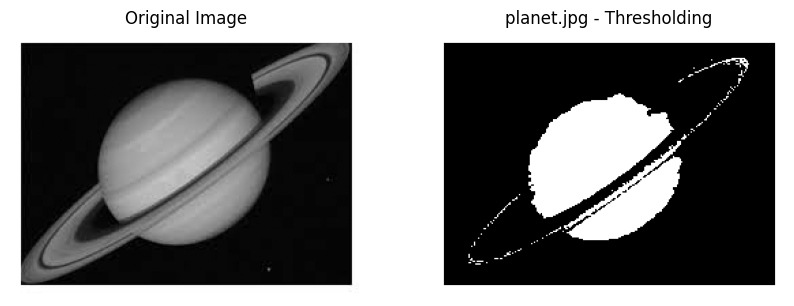

Processing sachin.jpg...


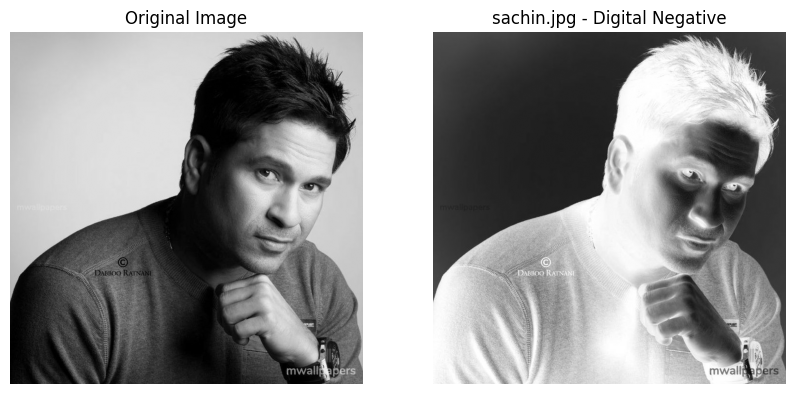

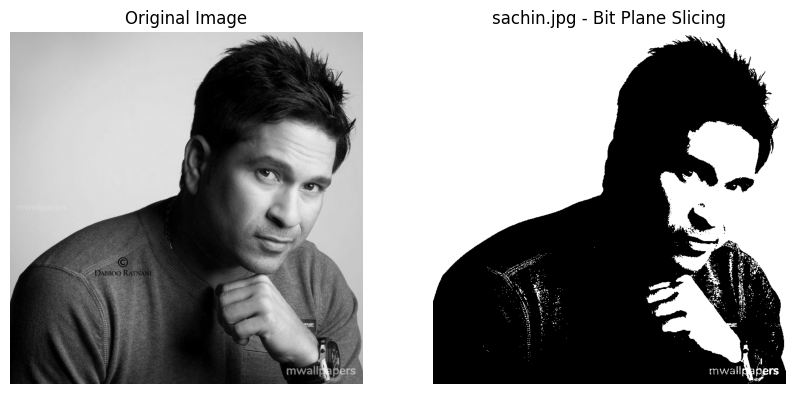

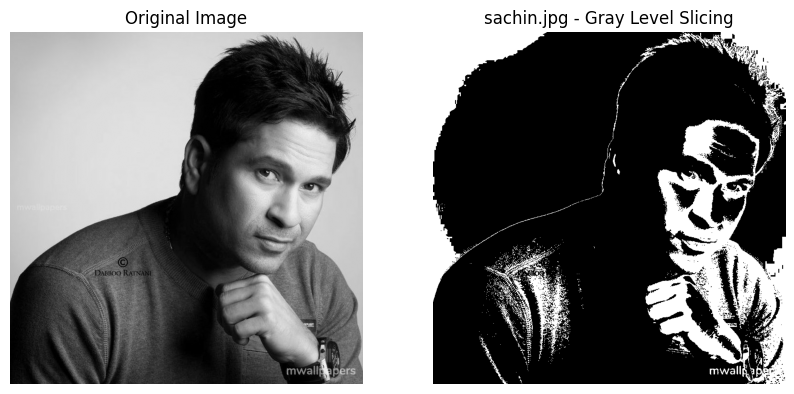

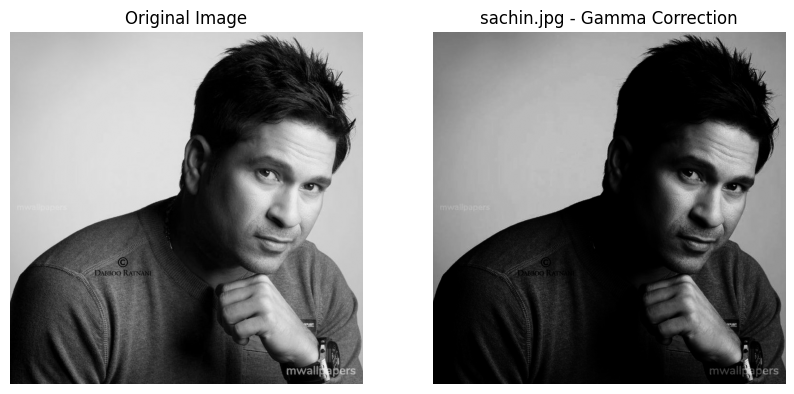

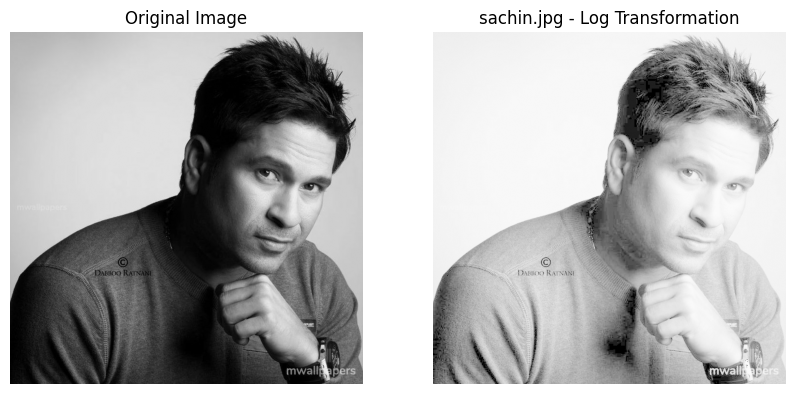

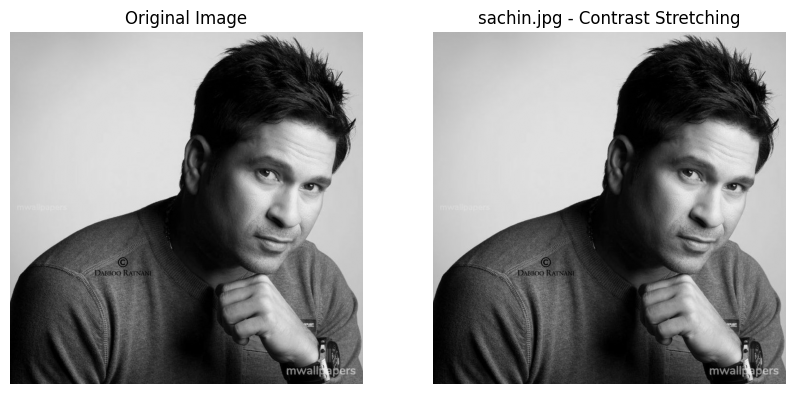

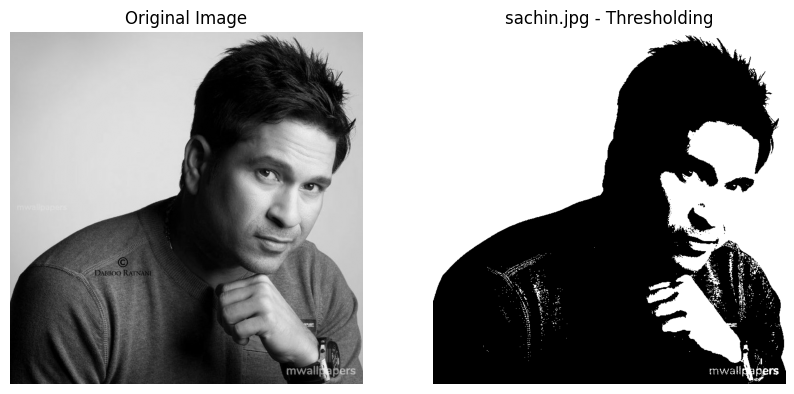

Processing xray.jpg...


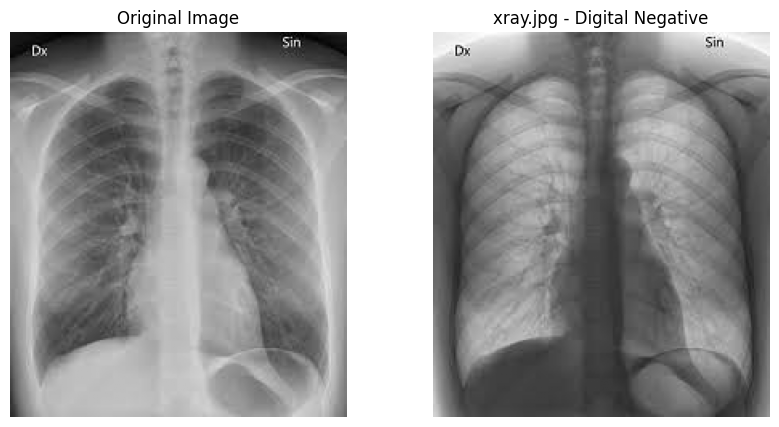

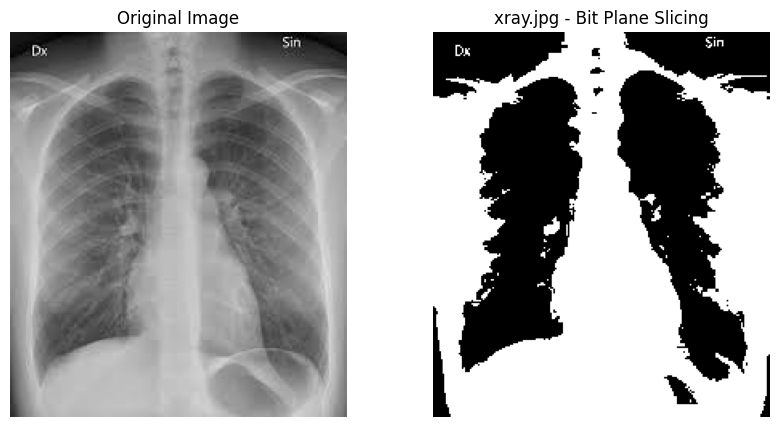

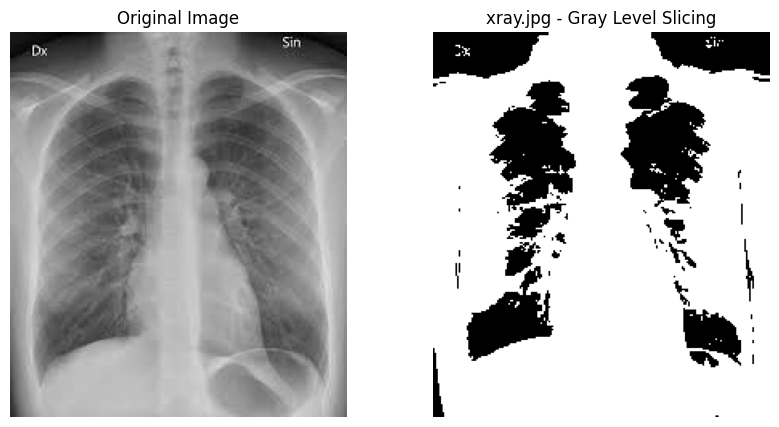

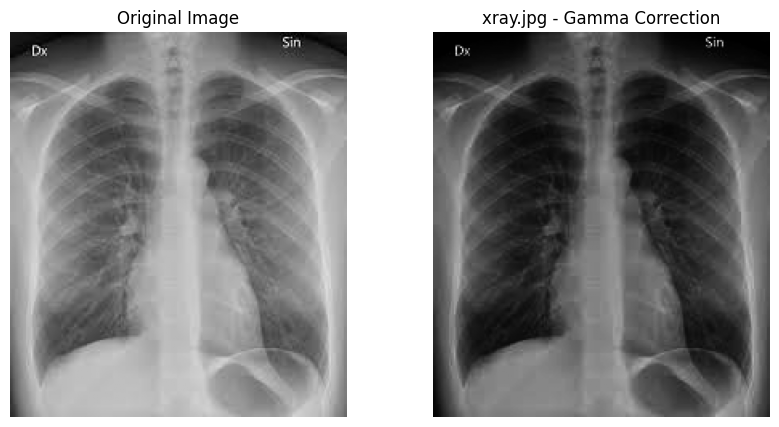

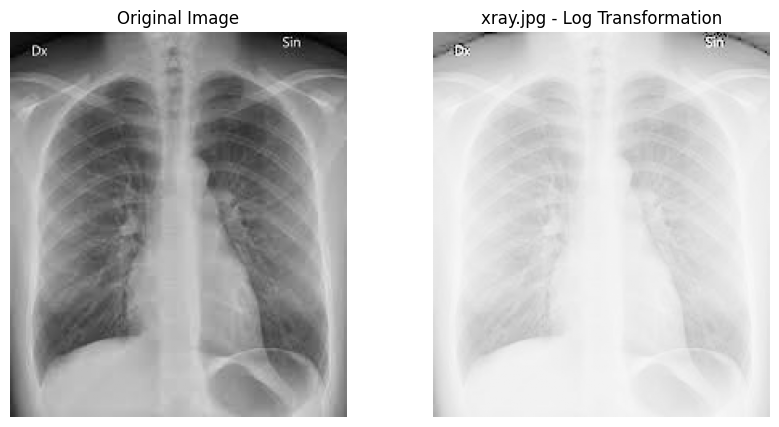

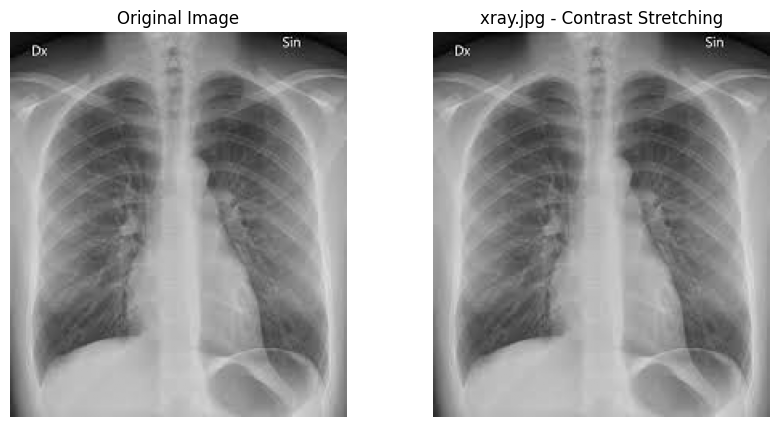

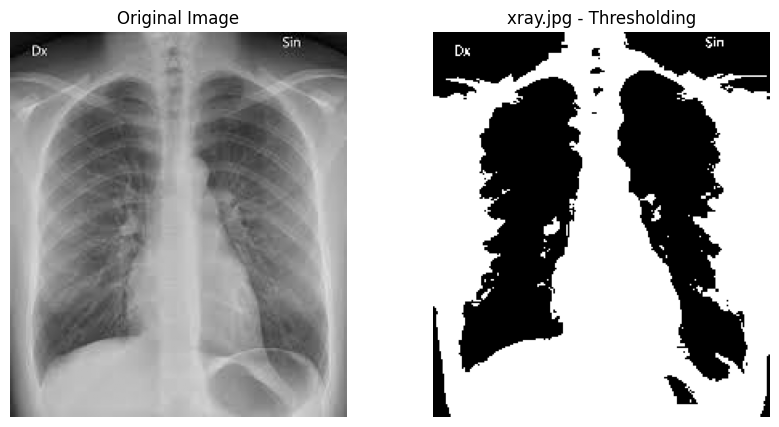

In [10]:
# Loop through each image and apply transformations
for file in image_files:
    # Load the image in grayscale mode
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Could not read {file}.")
        continue

    # Apply transformations
    neg_img = digital_negative(img)
    bit_img = bit_plane_slicing(img, 7)  # Extract 7th bit (MSB)
    gray_img = gray_level_slicing(img, 100, 200)  # Highlight gray levels between 100 and 200
    gamma_img = gamma_correction(img, 2.2)  # Gamma = 2.2
    log_img = log_transformation(img)
    contrast_img = contrast_stretching(img, np.min(img), np.max(img))
    _, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Display results
    print(f"Processing {file}...")
    display_images(img, neg_img, title2=f"{file} - Digital Negative")
    display_images(img, bit_img, title2=f"{file} - Bit Plane Slicing")
    display_images(img, gray_img, title2=f"{file} - Gray Level Slicing")
    display_images(img, gamma_img, title2=f"{file} - Gamma Correction")
    display_images(img, log_img, title2=f"{file} - Log Transformation")
    display_images(img, contrast_img, title2=f"{file} - Contrast Stretching")
    display_images(img, thresh_img, title2=f"{file} - Thresholding")
